In [1]:
from numpy import mean
from numpy import std
import numpy as np
import itertools
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

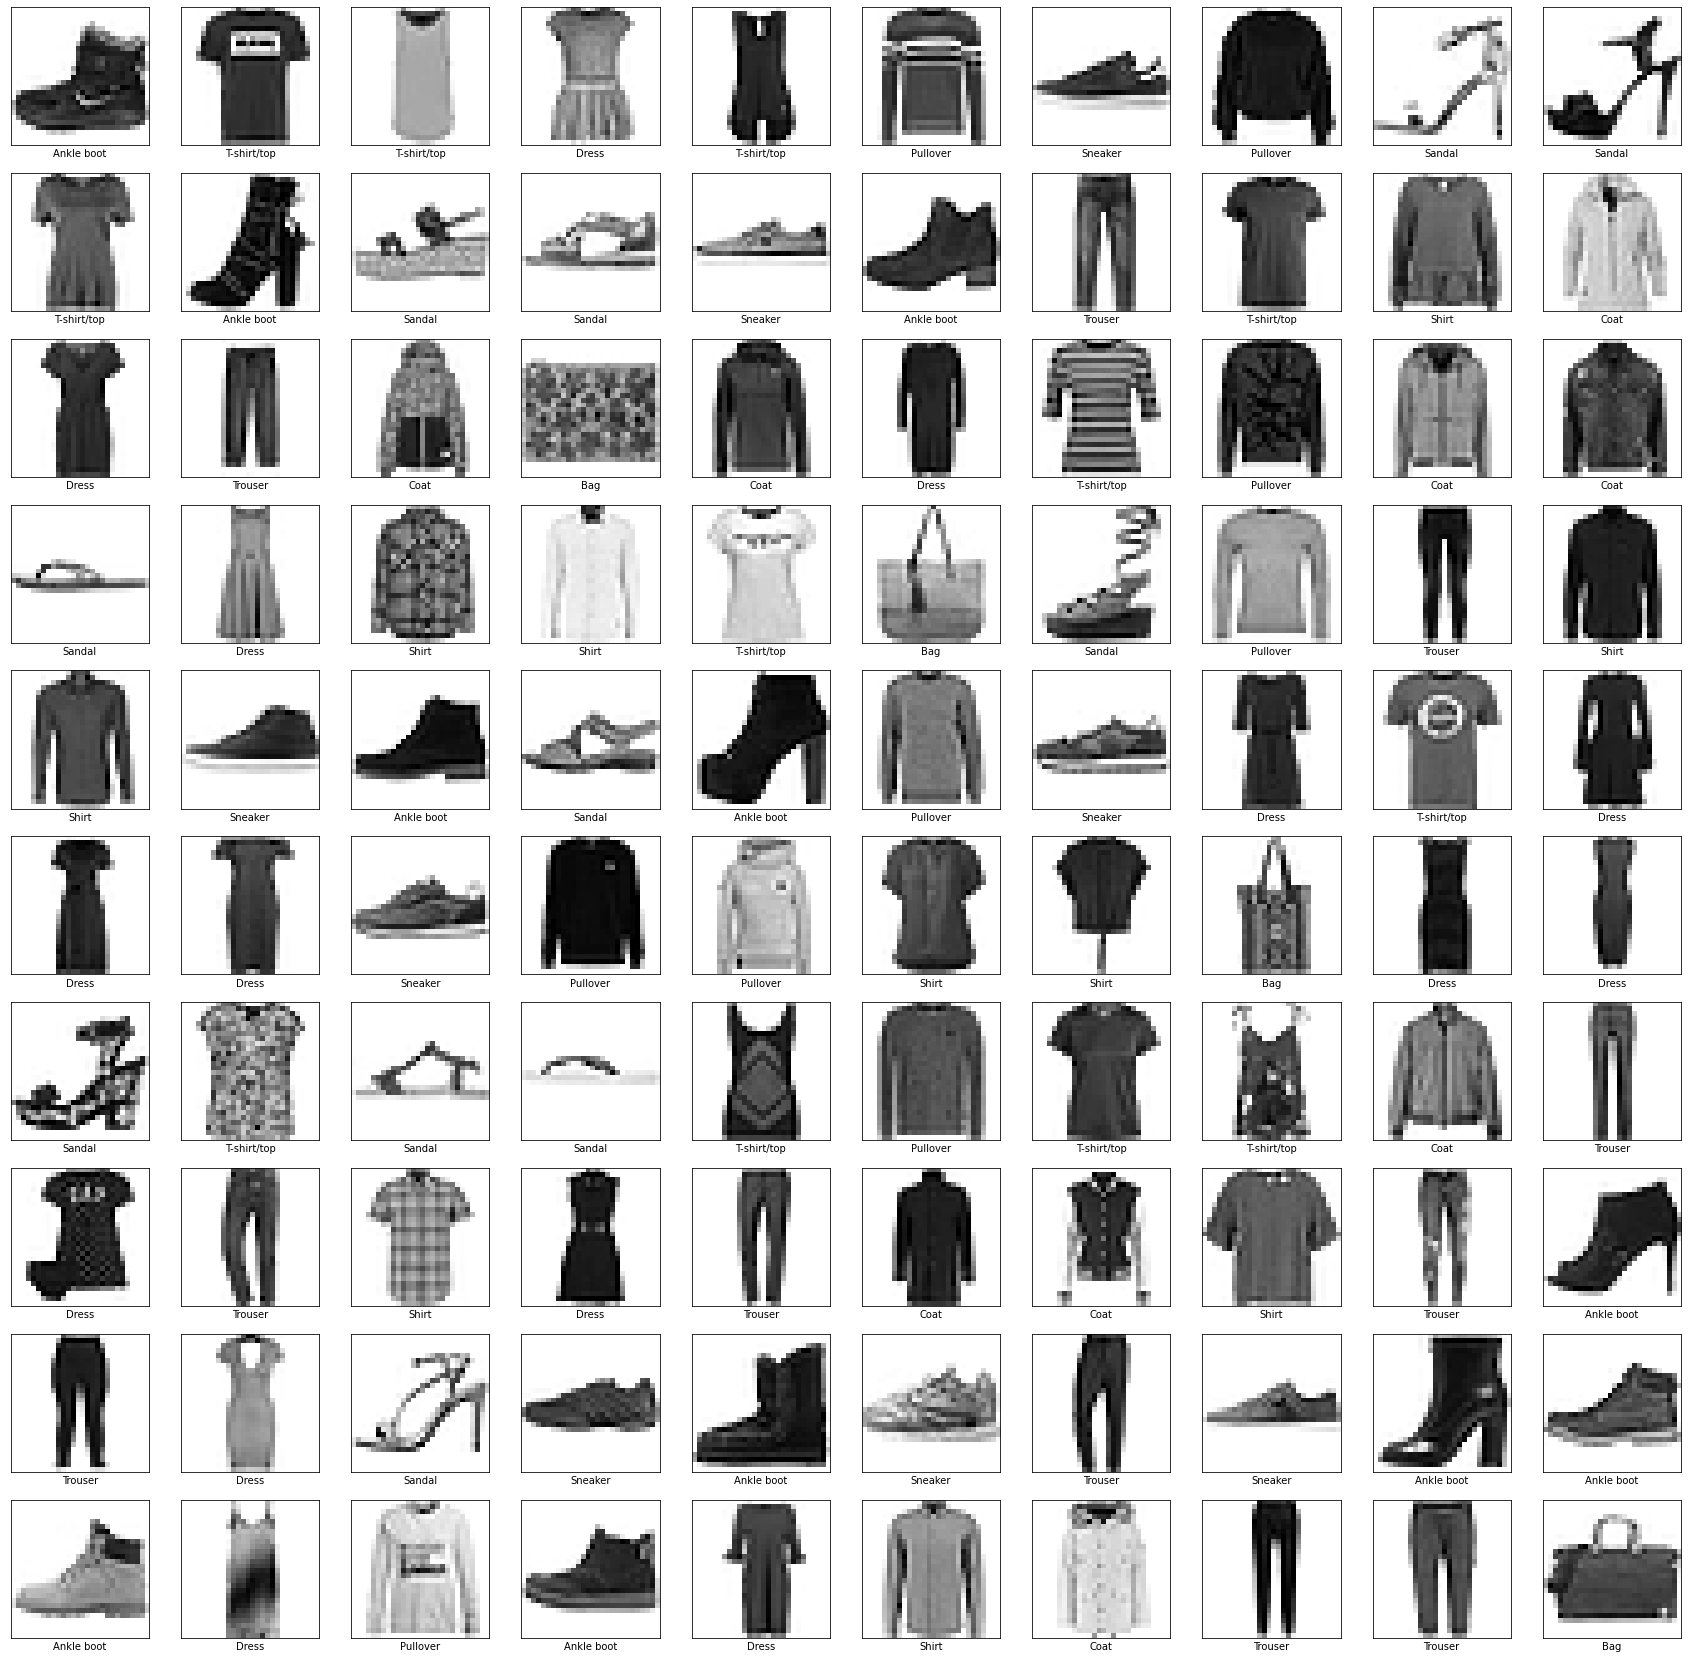

In [4]:
pyplot.figure(figsize=(30,30))
for i in range(100):
    pyplot.subplot(10,10,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(x_train[i], cmap=pyplot.cm.binary)
    pyplot.xlabel(class_names[y_train[i]])


In [5]:
print("train_images:", x_train.shape)
print("test_images:", x_test.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


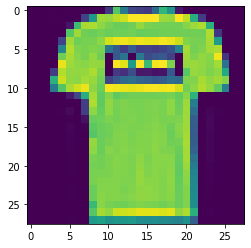

In [6]:
pyplot.figure()
pyplot.imshow(x_train[1])
#pyplot.colorbar()
pyplot.grid(False)

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [9]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
test = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer])

Epoch 1/20
550/550 [==============================] - 56s 101ms/step - loss: 0.9121 - accuracy: 0.6564 - val_loss: 0.3943 - val_accuracy: 0.8620

Epoch 00001: val_loss improved from inf to 0.39433, saving model to model.weights.best.hdf5
Epoch 2/20
550/550 [==============================] - 55s 100ms/step - loss: 0.4531 - accuracy: 0.8345 - val_loss: 0.3612 - val_accuracy: 0.8718

Epoch 00002: val_loss improved from 0.39433 to 0.36116, saving model to model.weights.best.hdf5
Epoch 3/20
550/550 [==============================] - 55s 99ms/step - loss: 0.4013 - accuracy: 0.8537 - val_loss: 0.3147 - val_accuracy: 0.8802

Epoch 00003: val_loss improved from 0.36116 to 0.31473, saving model to model.weights.best.hdf5
Epoch 4/20
313/550 [================>.............] - ETA: 22s - loss: 0.3664 - accuracy: 0.8682

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('Test accuracy:{:.4f}'.format(score[1]))
#print test loss
print("Test Loss: {:.4f}".format(score[0]))

In [ ]:
#Plot loss results for training data
pyplot.plot(test.history['loss'], 'blue')
pyplot.plot(test.history['val_loss'], 'orange')
pyplot.title('Model loss for Conv')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validate'], loc='upper right')

In [ ]:
#Plot accuracy results for training data
pyplot.plot(test.history['accuracy'], 'blue')
pyplot.plot(test.history['val_accuracy'], 'orange')
pyplot.title('Model accuracy for Conv')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validate'], loc='lower right')

In [ ]:
def plot_confusion_mat(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):    
    

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > (cm.max() / 2) else "black")
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Predict class level 
y_hat = model.predict(x_test)
predicted_label = []
for i in range(y_hat.shape[0]):
    predicted_label.append(np.argmax(y_hat[i]))
truth_label = np.argmax(y_test, axis = 1)

#Write the predicted level of test data set to a file
file1 = open("cnn.txt","w")
for i in range(len(predicted_label)):
  file1.write(class_names[predicted_label[i]])
  file1.write("\n")
file1.close()

#Generate confusion matrix
confusion_mat=confusion_matrix(truth_label, predicted_label)
plot_confusion_mat(confusion_mat,classes = class_names)



In [ ]:
#Classification report
print(classification_report(truth_label, predicted_label, target_names = class_names))